<a href="https://colab.research.google.com/github/grkashani/CalDetMat/blob/master/twinner_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Twinner

## Prepreation

### Tensorflow  




#### Confirm TensorFlow can see the GPU


Simply select "GPU" in the Accelerator drop-down in Notebook Settings (either through the Edit menu or the command palette at cmd/ctrl-shift-P).

In [3]:
import cv2
import pandas as pd
import numpy as np
import skimage.color
import skimage.io
import skimage.transform
import matplotlib.pyplot as plt
import tensorflow as tf

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))


Found GPU at: /device:GPU:0


#### Tensorflow Version

In [4]:
tf.__version__

'1.13.1'

#### Installation Tensorflow API

In [5]:
!git clone --quiet https://github.com/tensorflow/models.git

!apt-get install -qq protobuf-compiler python-tk

!pip install -q Cython contextlib2 pillow lxml matplotlib PyDrive

!pip install -q pycocotools

!ls

fatal: destination path 'models' already exists and is not an empty directory.
gdrive	models	sample_data  twinner


#### Pretrained Model



In [7]:
%cd /content/models
import os
import shutil
import glob
import urllib
import tarfile
import urllib.request

model_name = 'ssd_mobilenet_v1_coco_2018_01_28'
if os.path.exists(model_name):
  !rm -r $model_name

model_filename = model_name + '.tar.gz'
if os.path.isfile(model_filename):
  os.remove(model_filename)

model_url = 'http://download.tensorflow.org/models/object_detection/' + model_filename
urllib.request.urlretrieve(model_url,model_filename)

tar = tarfile.open(model_filename)
tar.extractall()
tar.close()

os.remove(model_filename)


from shutil import copyfile
pre_model_path = '/content/models/' + model_name
config_file = pre_model_path + '/pipeline.config'
config_file_back = config_file + '.back'

copyfile(config_file, config_file_back)


/content/models


'/content/models/ssd_mobilenet_v1_coco_2018_01_28/pipeline.config.back'

#### Add Path to Enviurment 

In [8]:
%cd /content/models/research/
import os, sys
!protoc object_detection/protos/*.proto --python_out=.

current_path = !pwd
pwd = current_path[0]
need_path =  ':' + pwd + ':' + pwd + '/slim'

os.environ['PYTHONPATH'] += need_path
sys.path.append(pwd)
sys.path.append(pwd + '/slim')

print(os.environ['PYTHONPATH'])
print(sys.path)


/content/models/research
/env/python:/content/models/research:/content/models/research/slim
['', '/env/python', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.6/dist-packages/IPython/extensions', '/root/.ipython', '/content/models/research', '/content/models/research/slim']


#### Check Tensorflow API

In [9]:
!python3 object_detection/builders/model_builder_test.py


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

............s...
----------------------------------------------------------------------
Ran 16 tests in 0.070s

OK (skipped=1)


### Dreictories 

#### Google Drive 

In [0]:
import datetime

def change_string(strdata, strold, strnew):
  newstrdata = strdata.replace(strold, strnew)
  return newstrdata

def get_str_datetime_now():
  str_date = '_' + change_space(str(datetime.datetime.now()),' ','_')
  return str_date



In [11]:
from google.colab import drive
drive.mount('/content/gdrive/')


Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


#### Directories Preperation


In [12]:
project_name = 'twinner'

gdrive_main_path = '/content/gdrive/My Drive/Colab Notebooks/'
gdrive_project_path = gdrive_main_path + project_name
project_image_path = gdrive_project_path + '/GoogleColab/raw_data/cars/'
linux_project_image_path = change_string(project_image_path,' ','\ ')
!ls $linux_project_image_path*.txt | wc -l




284


In [13]:
import os

def create_dir(directory):
    if os.path.exists(directory):
        print('directory of ',directory,'aleady existed')
    else :
        os.makedirs(directory)
        print('Directory of {} created.'.format(directory))



main_path = '/content/'
project_path = main_path + project_name 
training_path         = project_path + '/training'
data_path             = project_path + '/data'
data_test_path  = data_path + '/test'
data_train_path = data_path + '/train'


create_dir(project_path)
create_dir(data_path)             
create_dir(training_path)         
create_dir(data_test_path)  
create_dir(data_train_path) 



directory of  /content/twinner aleady existed
directory of  /content/twinner/data aleady existed
directory of  /content/twinner/training aleady existed


NameError: ignored

####  showing a image 


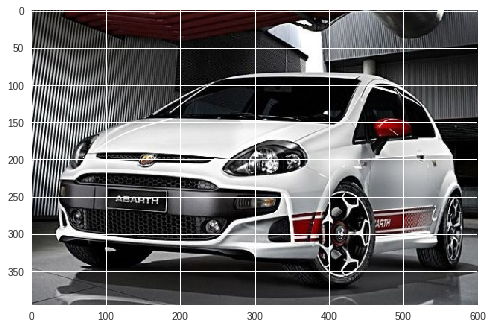

In [0]:
import cv2
import pandas as pd
import numpy as np
import skimage.color
import skimage.io
import skimage.transform
import matplotlib.pyplot as plt
img=cv2.imread(project_image_path + '010200140010001_angularfront.JPEG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

### TensorBoard

#### Prepare all necessary files and binaries.


In [0]:
%cd /datalab

!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip
!gsutil -q -m cp -R gs://download-dopamine-rl/compiled_tb_event_files.tar.gz /content/
!tar -xvzf /content/compiled_tb_event_files.tar.gz


/datalab
--2019-04-01 16:32:05--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 3.92.108.98, 52.72.245.79, 52.45.111.123, ...
Connecting to bin.equinox.io (bin.equinox.io)|3.92.108.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14977695 (14M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  14.28M  60.1MB/s    in 0.2s    

2019-04-01 16:32:05 (60.1 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [14977695/14977695]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   
./
./rainbow/
./rainbow/VideoPinball/
./rainbow/VideoPinball/4/
./rainbow/VideoPinball/4/tb_events/
./rainbow/VideoPinball/4/tb_events/events.out.tfevents.1534185088.vzid9-v6.prod.google.com
./rainbow/VideoPinball/4/tb_events/events.out.tfevents.1534526398.vzsc1-v6.prod.google.com
./rainbow/VideoPinball/3/
./rainbow/VideoPinball/3/tb_events

#### Select which project to visualize.


In [0]:
LOG_DIR = '/content/{}/training'.format(project_name)
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

####  Start the tensorboard

In [0]:
get_ipython().system_raw('./ngrok http 6006 &')
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://7bea3e19.ngrok.io


## Object Detection 


The taks is to train the object detection model using the annotated set of car's images. <br>
There are two object classes to detect: **headlight** and **wheel**.<br>
The model should be validated with relevant evaluation metric.


### Split data to train and test 


In [0]:
import os
from shutil import copyfile
def copy_file(source_path,dest_path, filename, ext,counter, print_flag=False):
  source = source_path + base_filename +  ext   
  dest = dest_path + base_filename + ext
  try:
      if not os.path.isfile(dest) :
        copyfile(source, dest)
      if print_flag:
          if (counter-1)%40==0:
              print(counter,"copid from:",source,'to:',dest)
      return True
  except:
    return False


train_front = 1.0
test_front=1.0
train_side=1.0
test_side=1.0
for filename in os.listdir(project_image_path):
    if filename.endswith('JPEG'):
        base_filename = filename.split('.')[0]
        if base_filename.endswith('front') :
            if train_front/test_front < 9:
                dest = data_train_path 
                train_front += 1.0
            else:
                dest = data_test_path
                test_front += 1.0
                
        elif base_filename.endswith('view'):
            if train_side/test_side < 9:
                dest = data_train_path
                train_side += 1.0
            else:
                dest = data_test_path
                test_side += 1.0
        else:
            raise SystemError('there are some files with different angle')

        destination_path = dest + '/'
        total = train_front + train_side + test_front + test_side -4          

        if copy_file(project_image_path,destination_path,base_filename,'.txt', total):
            copy_file(project_image_path,destination_path,base_filename,'.JPEG', total,True)
        else:
            print("There is no YOLO information for file : ", base_filename)

            
train_front = int(train_front - 1)            
train_side = int(train_side - 1)            
test_front = int(test_front - 1)            
test_side = int(test_side - 1)            

print('train_front:', train_front, ' train_side:', train_side , ' total image in train:', train_front + train_side," / ", total)
print('test_front:', test_front, ' test_side:', test_side , ' total image in test:', test_front + test_side," / ", total)

           


1.0 copid from: /content/gdrive/My Drive/Colab Notebooks/twinner/GoogleColab/raw_data/cars/010570050010001_sideview.JPEG to: /content/twinner/data/train/010570050010001_sideview.JPEG
41.0 copid from: /content/gdrive/My Drive/Colab Notebooks/twinner/GoogleColab/raw_data/cars/010601180180001_angularfront.JPEG to: /content/twinner/data/train/010601180180001_angularfront.JPEG
81.0 copid from: /content/gdrive/My Drive/Colab Notebooks/twinner/GoogleColab/raw_data/cars/010200130010001_sideview.JPEG to: /content/twinner/data/train/010200130010001_sideview.JPEG
121.0 copid from: /content/gdrive/My Drive/Colab Notebooks/twinner/GoogleColab/raw_data/cars/010601360020002_sideview.JPEG to: /content/twinner/data/train/010601360020002_sideview.JPEG
161.0 copid from: /content/gdrive/My Drive/Colab Notebooks/twinner/GoogleColab/raw_data/cars/010600810040004_angularfront.JPEG to: /content/twinner/data/train/010600810040004_angularfront.JPEG
201.0 copid from: /content/gdrive/My Drive/Colab Notebooks/twin

### Yolo to XML

In [0]:
import os
import xml.etree.cElementTree as ET
from PIL import Image

def create_root(file_prefix, width, height):
    root = ET.Element("annotations")
    ET.SubElement(root, "filename").text = "{}.JPEG".format(file_prefix)
    ET.SubElement(root, "folder").text = "images"
    size = ET.SubElement(root, "size")
    ET.SubElement(size, "width").text = str(width)
    ET.SubElement(size, "height").text = str(height)
    ET.SubElement(size, "depth").text = "3"
    return root



def create_object_annotation(root, voc_labels):
    for voc_label in voc_labels:
        obj = ET.SubElement(root, "object")
        ET.SubElement(obj, "name").text = voc_label[0]
        ET.SubElement(obj, "pose").text = "Unspecified"
        ET.SubElement(obj, "truncated").text = str(0)
        ET.SubElement(obj, "difficult").text = str(0)
        bbox = ET.SubElement(obj, "bndbox")
        ET.SubElement(bbox, "xmin").text = str(voc_label[1])
        ET.SubElement(bbox, "ymin").text = str(voc_label[2])
        ET.SubElement(bbox, "xmax").text = str(voc_label[3])
        ET.SubElement(bbox, "ymax").text = str(voc_label[4])
    return root

def create_file(file_prefix, width, height, voc_labels):
    root = create_root(file_prefix, width, height)
    root = create_object_annotation(root, voc_labels)
    tree = ET.ElementTree(root)
    tree.write("{}.xml".format(file_prefix))



def read_file(file_path):
    file_prefix = file_path.split(".txt")[0]
    image_file_name = "{}.JPEG".format(file_prefix)
    img = Image.open("{}".format(image_file_name))
    w, h = img.size
    with open(file_path, 'r') as file:
        lines = file.readlines()
        voc_labels = []
        for line in lines:
            voc = []
            line = line.strip()
            data = line.split()
            voc.append(CLASS_MAPPING.get(data[0]))
            bbox_width = float(data[3]) * w
            bbox_height = float(data[4]) * h
            center_x = float(data[1]) * w
            center_y = float(data[2]) * h
            voc.append(int(center_x - (bbox_width / 2)))
            voc.append(int(center_y - (bbox_height / 2)))
            voc.append(int(center_x + (bbox_width / 2)))
            voc.append(int(center_y + (bbox_height / 2)))
            voc_labels.append(voc)
    create_file(file_prefix, w, h, voc_labels)


mydata_path = data_path + '/'

CLASS_MAPPING = {
    '0': 'wheel',
    '1': 'headlight'
}            

for directory in ['train', 'test']:
    image_path = os.path.join(mydata_path, '{}/'.format(directory))
    i = 1
    j = 1
    for filename in os.listdir(image_path):
        if filename.endswith('txt'):
            xmlfile = image_path + filename.split('.')[0] + '.xml'
            if not os.path.isfile(xmlfile) :
                file = image_path + filename
                read_file(file)
                i += 1
            else:
                j += 1
            if i%40 == 0:
                print(i, "Processing complete for file: {}".format(file))
    print(i-1,' xml file has been created and ', j-1,' xml file has been checked for directory of ',directory)


40 Processing complete for file: /content/twinner/data/train/010600140020002_angularfront.txt
80 Processing complete for file: /content/twinner/data/train/010600340040002_angularfront.txt
120 Processing complete for file: /content/twinner/data/train/010600720020001_angularfront.txt
160 Processing complete for file: /content/twinner/data/train/010600570110023_angularfront.txt
200 Processing complete for file: /content/twinner/data/train/010601350150001_sideview.txt
240 Processing complete for file: /content/twinner/data/train/010601380010005_sideview.txt
256  xml file has been created and  0  xml file has been checked for directory of  train
28  xml file has been created and  0  xml file has been checked for directory of  test



### Create CSV label

In [0]:
##@title func
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET

def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            value = (root.find('filename').text,
                     int(root.find('size')[0].text),
                     int(root.find('size')[1].text),
                     member[0].text,
                     int(member[4][0].text),
                     int(member[4][1].text),
                     int(member[4][2].text),
                     int(member[4][3].text)
                     )
            xml_list.append(value)
    column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df


mydata_path = data_path + '/'

for directory in ['train', 'test']:
    image_path = os.path.join(mydata_path, '{}'.format(directory))
    xml_df = xml_to_csv(image_path)
    xml_df.to_csv(mydata_path + '/{}_labels.csv'.format(directory), index=None)
    # print('Successfully converted xml to csv for directory ', directory)

!ls $mydata_path*.csv -lsh

12K -rw-r--r-- 1 root root 9.2K Apr  1 16:39 /content/twinner/data/test_labels.csv
84K -rw-r--r-- 1 root root  82K Apr  1 16:39 /content/twinner/data/train_labels.csv


### Create TFRecords 

In [0]:
##@title initial
# %cd {linux_path(project_path)}/models/research
from __future__ import division
from __future__ import print_function
from __future__ import absolute_import

import os
import io
import pandas as pdcv2
import tensorflow as tf

from PIL import Image  #
from object_detection.utils import dataset_util
from collections import namedtuple, OrderedDict
#@ funcs
def class_text_to_int(row_label):
    if row_label == 'wheel':
        return 1
    if row_label == 'headlight':
        return 2
    else:
        None


def split(df, group):
    data = namedtuple('data', ['filename', 'object'])
    gb = df.groupby(group)
    return [data(filename, gb.get_group(x)) for filename, x in zip(gb.groups.keys(), gb.groups)]


def create_tf_example(group, path):
    with tf.gfile.GFile(os.path.join(path, '{}'.format(group.filename)), 'rb') as fid:
        encoded_jpg = fid.read()
    encoded_jpg_io = io.BytesIO(encoded_jpg)
    image = Image.open(encoded_jpg_io)
    width, height = image.size

    filename = group.filename.encode('utf8')
    image_format = b'jpg'
    xmins = []
    xmaxs = []
    ymins = []
    ymaxs = []
    classes_text = []
    classes = []

    for index, row in group.object.iterrows():
        xmins.append(row['xmin'] / width)
        xmaxs.append(row['xmax'] / width)
        ymins.append(row['ymin'] / height)
        ymaxs.append(row['ymax'] / height)
        classes_text.append(row['class'].encode('utf8'))
        classes.append(class_text_to_int(row['class']))

    tf_example = tf.train.Example(features=tf.train.Features(feature={
        'image/height': dataset_util.int64_feature(height),
        'image/width': dataset_util.int64_feature(width),
        'image/filename': dataset_util.bytes_feature(filename),
        'image/source_id': dataset_util.bytes_feature(filename),
        'image/encoded': dataset_util.bytes_feature(encoded_jpg),
        'image/format': dataset_util.bytes_feature(image_format),
        'image/object/bbox/xmin': dataset_util.float_list_feature(xmins),
        'image/object/bbox/xmax': dataset_util.float_list_feature(xmaxs),
        'image/object/bbox/ymin': dataset_util.float_list_feature(ymins),
        'image/object/bbox/ymax': dataset_util.float_list_feature(ymaxs),
        'image/object/class/text': dataset_util.bytes_list_feature(classes_text),
        'image/object/class/label': dataset_util.int64_list_feature(classes),
    }))
    return tf_example

mydata_path = data_path + '/'
for directory in ['train', "test"]:
    output_path = mydata_path + "{}.record".format(directory)
    writer = tf.python_io.TFRecordWriter(output_path)
    
    image_dir = mydata_path + directory
    path = os.path.join(image_dir)
    csv_input = mydata_path + directory + "_labels.csv"
    print("Reading csv", csv_input)
    examples = pd.read_csv(csv_input)

    grouped = split(examples, 'filename')

    for group in grouped:
        tf_example = create_tf_example(group, path)
        writer.write(tf_example.SerializeToString())

    writer.close()
    # print('Successfully created the TFRecords: {}'.format(output_path))

!ls $mydata_path*.record -lsh

Reading csv /content/twinner/data/train_labels.csv
Reading csv /content/twinner/data/test_labels.csv
960K -rw-r--r-- 1 root root 959K Apr  1 16:39 /content/twinner/data/test.record
9.2M -rw-r--r-- 1 root root 9.2M Apr  1 16:39 /content/twinner/data/train.record


### Creat label_map.pbtxt



In [0]:
mydata_path = data_path + '/'

label_map_file = mydata_path + 'label_map.pbtxt' 
train_labels = mydata_path + 'train_labels.csv'
# print(train_labels)

file = pd.read_csv(train_labels)
categories = file['class'].unique()
end = '\n'
s = ' '
class_map = {}
for ID, name in enumerate(categories):
    out = ''
    out += 'item' + s + '{' + end
    out += s*2 + 'id:' + ' ' + (str(ID+1)) + end
    out += s*2 + 'name:' + ' ' + '\'' + name + '\'' + end
    out += '}' + end*2
    with open(label_map_file, 'a') as f:
        f.write(out)
    class_map[name] = ID+1


!cat $label_map_file

item {
  id: 1
  name: 'wheel'
}

item {
  id: 2
  name: 'headlight'
}



### Config config file 


In [0]:
import re

gdrive_training_path = gdrive_project_path + '/training'
latest_model_path = tf.train.latest_checkpoint(gdrive_training_path)
print('latest check point:', latest_model_path)

mydata_path = data_path + '/'
copyfile(config_file_back, config_file)
print(config_file)


with open(config_file) as f:
    s = f.read()
with open(config_file, 'w') as f:
  if latest_model_path is not None:
    dir_model_kpt = latest_model_path
  else:
    dir_model_kpt  = pre_model_path + '/model.ckpt'
  dir_train_record = mydata_path + 'train.record'
  dir_test_record = mydata_path + 'test.record'
  dir_label_map = mydata_path + 'label_map.pbtxt'


  # shold be dynamic for future , number of class = 2 for noq
  s = re.sub('batch_size: 24', 'batch_size: 8', s) 
  s = re.sub('num_classes: 90', 'num_classes: 2', s) 
  s = re.sub('PATH_TO_BE_CONFIGURED/model.ckpt', dir_model_kpt, s)
  s = re.sub('PATH_TO_BE_CONFIGURED/mscoco_train.record', dir_train_record, s)
  s = re.sub('PATH_TO_BE_CONFIGURED/mscoco_val.record', dir_test_record, s)
  s = re.sub('PATH_TO_BE_CONFIGURED/mscoco_label_map.pbtxt', dir_label_map, s)

  f.write(s)

!cat $config_file


latest check point: None


### Train the model

In [0]:
# NUM_TRAIN_STEPS=50000;
# SAMPLE_1_OF_N_EVAL_EXAMPLES=1;
# %cd /content/models/research/object_detection


cmd = '/content/models/research/object_detection/model_main.py'
cmd += ' --pipeline_config_path=' + config_file 
cmd += ' --model_dir=' + training_path 
# cmd += ' --num_train_steps=' + str(NUM_TRAIN_STEPS)
# cmd += ' --sample_1_of_n_eval_examples=' + str(SAMPLE_1_OF_N_EVAL_EXAMPLES)
cmd += ' --alsologtostderr'

# !echo $PYTHONPATH
# !echo $PATH
!echo $cmd


/content/models/research/object_detection/model_main.py --pipeline_config_path=/content/models/ssd_mobilenet_v1_coco_2018_01_28/pipeline.config --model_dir=/content/twinner/training --alsologtostderr


In [0]:
!python3 $cmd


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use `tf.data.experimental.parallel_interleave(...)`.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
`seed2` arg is deprecated.Use sample_distorted_bounding_box_v2 instead.
Instructions for updating:
Use the `axis` argument instead
Instructions for updating:
Use `tf.data.Dataset.batch(..., drop_remainder=True)`.
2019-04-01 16:57:50.432419: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2019-04-01 16:57:50.432719: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0xf0af340 executing computations on platform Host. Devices:
2019-04-01 

## Result

### Export Inference 

In [0]:
gdrive_training_path = gdrive_project_path + '/training.1'
print(gdrive_training_path)

latest_model_path = tf.train.latest_checkpoint(gdrive_training_path)
print('latest check point:', latest_model_path)

# output_path = gdrive_project_path + '/output_' + get_str_datetime_now()
# !mkdir $output_path
# %cd /content/models/research/object_detection

# !python3 export_inference_graph.py \
#     --input_type image_tensor \
#     --pipeline_config_path /content/models/ssd_mobilenet_v1_coco_2018_01_28/pipeline.config \
#     --trained_checkpoint_prefix /content/twinner/training/model.ckpt-34982 \
#     --output_directory $output_path

NameError: ignored